# **Programming Assignment 1 - Jessica de Souza**


Link to assignment page: https://canvas.ucsd.edu/courses/33936/files/folder/homework?preview=5989313



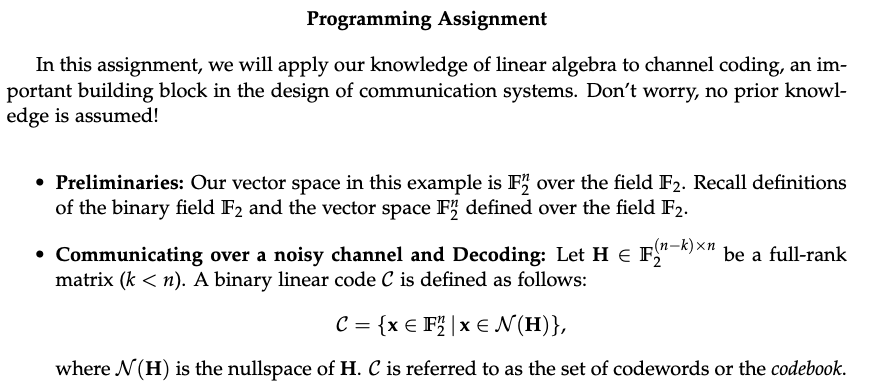

## **Questions:**

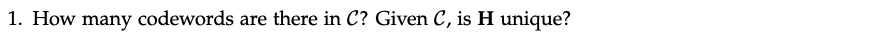

In [558]:
#Q1 Responses in the report

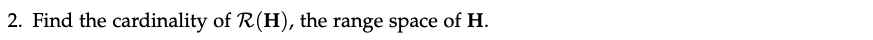

In [559]:
#Q2 Responses in the report

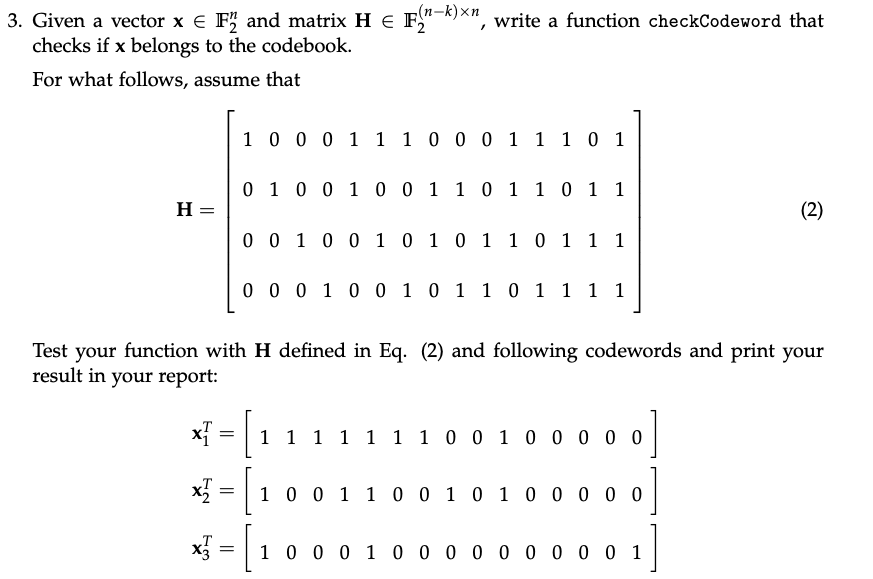

In [560]:
#Q3

import numpy as np
from sympy import * 


# Question variables

H = np.array([[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
              [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1],
              [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
              [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]])

x1_t = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])
x2_t = np.array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])
x3_t = np.array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])


# Functions used to find codeword

def matrix_sum(h):
    # Sum matrix rows and returns the binary values
    
    assert isinstance(h,np.ndarray)
    
    result = np.sum(h, axis=1)    
    result = result %2
        
    return np.array(result)


def checkCodeword(h,a):
    # Input: Matrix h and codeword a
    # Output: False = a is not a codeword
    #         True = a is a codeword   
    
    assert isinstance(h,np.ndarray)
    assert isinstance(a,np.ndarray)
    
    # Verifies if x and h have the same number of columns
    sizeh = h.shape 
    colsh = sizeh[1]
    assert colsh == len(a)
    
    # Find position in h that matches the position for a=1
    indexes = np.where(a == 1)[0]
    
    # Calls function matrix_sum to binary add the rows 
    sum_res = matrix_sum(h[:,indexes])
    
    print("Result from parity check:" + str(sum_res))
    
    # If all rows are zero, it is a valid codeword
    return not np.any(sum_res)

# x1 is not a codeword
print('x1_t = ' + str(x1_t))

res = checkCodeword(H,x1_t)
print(res)
print()

# x2 is a codeword
print('x2_t = ' + str(x2_t))

res2 = checkCodeword(H,x2_t)
print(res2)
print()

# x3 is not a codeword
print('x3_t = ' + str(x3_t))

res3 = checkCodeword(H,x3_t)
print(res3)
print()


x1_t = [1 1 1 1 1 1 1 0 0 1 0 0 0 0 0]
Result from parity check:[0 0 1 1]
False

x2_t = [1 0 0 1 1 0 0 1 0 1 0 0 0 0 0]
Result from parity check:[0 0 0 0]
True

x3_t = [1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
Result from parity check:[1 0 1 1]
False



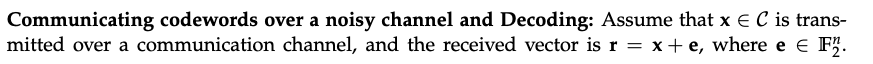

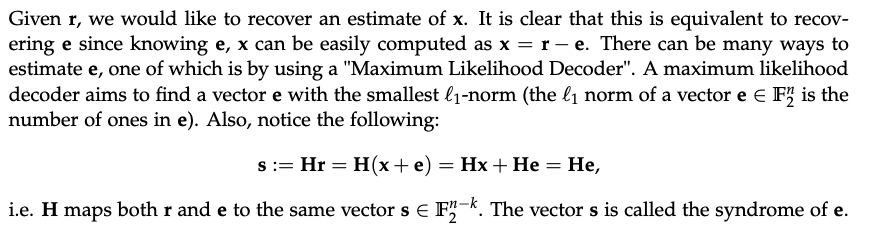

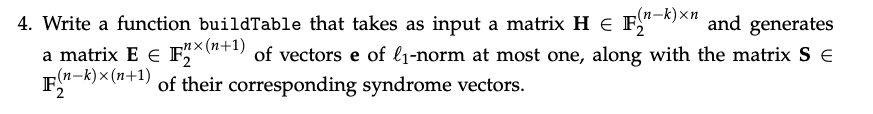

In [561]:
# Q4

H_m = Matrix([[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
           [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1],
           [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
           [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]])

def buildTable(h):
    
    size_h = h.shape
    rows_h = size_h[1]
    
    e = np.zeros(shape=(rows_h+1,rows_h), dtype = int)
    
    # For the error matrix, we are only considering l1-norm values
    # 1st row is 0 = no error
    # other rows: 1 in each column (diagonal)
    aux=0
    for i in range(1,rows_h+1):
        e[i,aux] = 1
        aux+=1
    
    #this is the l1-norm matrix
    e=np.transpose(e)
    #print(e)
    
    # for the syndrome, we need to perform S=e_i*H
    s = np.zeros(shape=(rows_h+1,4), dtype = int)
    for i in range(rows_h+1):
        s[i] = matrix_sum(e[:,i]*h) 

    #print(s)

    return np.transpose(e),s

E,S = buildTable(H)
print("Error Matrix:")
print(E)
print("\n")

print("Syndrome Matrix:")
print(S)
print("\n")

Error Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


Syndrome Matrix:
[[0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 1 0 0]
 [1 0 1 0]
 [1 0 0 1]
 [0 1 1 0]
 [0 1 0 1]
 [0 0 1 1]
 [1 1 1 0]
 [1 1 0 1]
 [1 0 1 1]
 [0 1 1 1]
 [1 1 1 1]]




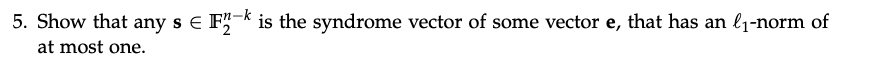

In [562]:
#Q5 Responses in the report

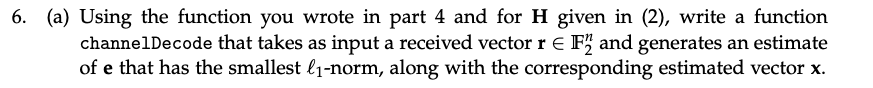

In [563]:
#Q6a

def binary_sub(a,b):
    assert isinstance(a,np.ndarray)
    assert isinstance(b,np.ndarray)
    assert len(a)==len(b)
    
    result = []
    aux = 0
    
    for i in range(len(a)):
        aux = a[i]-b[i]
        if aux == -1:
            aux = 1
        result.append(aux)    
        
    return np.array(result)

def channelDecode(r,h):
    
    # S = Hr = H(x+e) = Hx + He = He (Hx needs to be 0)
    #1: multiply h with r
    # verify if s is contained in the syndrome matrix
    
    e,s = buildTable(h)

    #transform syndrome and error in a lookup table dictionary for easier access
    ss = [s,e]
    s_lookup_table = dict()
    s_shape = s.shape
        
    for i in range(s_shape[0]):
        s_lookup_table[tuple(ss[0][i])] = list(ss[1][i])

    s_r = tuple(matrix_sum(r*h))
    e_r = s_lookup_table[s_r]
    
    x = binary_sub(np.array(r), np.array(e_r))
    
    return np.array(e_r), x

r = np.array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])
e,x = channelDecode(r,H)



print("Received vector:")
print("r = " + str(r))
print()

print("Estimated e:")
print("e = " + str(e))
print()

print("Corresponding Estimated x:") 
print("x = " + str(x))
print()

Received vector:
r = [1 0 1 1 0 0 0 0 0 1 1 0 1 1 0]

Estimated e:
e = [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]

Corresponding Estimated x:
x = [1 0 1 1 0 1 0 0 0 1 1 0 1 1 0]



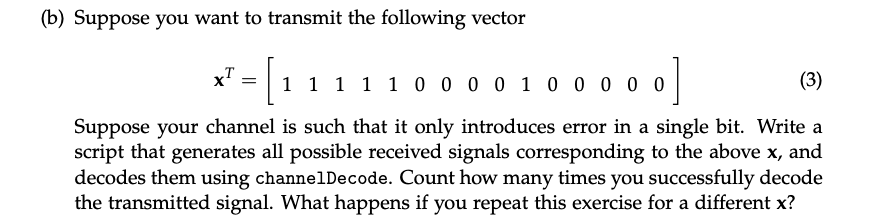

In [564]:
# Q6b

def binary_sum(a,b):
    assert isinstance(a,np.ndarray)
    assert isinstance(b,np.ndarray)
    assert len(a)==len(b)
    
    result = []
    aux = 0
    
    for i in range(len(a)):
        aux = a[i]+b[i]
        if aux == 2:
            aux = 0
        result.append(aux)    
        
    return np.array(result)

def generateReceived(x):
    # generates all possible r corresponding to x with 1 bit of error
    # Uses E and S from question 4
    E,S = buildTable(H)
    e_shape = E.shape
    
    r = []
    for i in range(e_shape[0]):
        r.append(binary_sum(x,E[i,:]))
    
    return np.array(r)

def decodeBlock(r,xt):
    
    #Now let's decode all these vectors:
    r_shape = r.shape
    
    e_i = []
    x_i = []
    compare = []
    idx = []

    aux = 0

    # Decode for each r
    for i in range(r_shape[0]):
            aux1,aux2 = channelDecode(r[i,:],H)
            e_i.append(aux1)
            x_i.append(aux2)  #after decoding, we need to verify if correction worked
            
            aux = 1*((xt == x_i[i]).all())
            compare.append(aux)  #verify if each received vector is equal to transmitted
            if aux:
                #stores index of correct vectors
                #print(i)
                idx.append(i)
                
    res = np.array(compare)
    tot = np.count_nonzero(res==1)  #n of 1s = n of success decodings
    
    e_i_array = np.array(e_i)
    x_i_array = np.array(x_i)
    
    #print(idx)
    #print("vector received, error fixed")
    #print(x_i_array[idx])
    #print(e_i_array[idx])
    
    print("From all received vector, we could decode to the correct input %d times!" %tot )
    
    
########

x_t = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
R = generateReceived(x_t)

print("Vector transmitted:")
print(x_t)

#print("If xH=0, x is part of the set of codewords and can be decoded:")
#print(matrix_sum(x_t*H))

print("Possible received signals:")
print(R)

decodeBlock(R, x_t)

Vector transmitted:
[1 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
Possible received signals:
[[1 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 1 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 1 0 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 1 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 1 0 1 0 0 0]
 [1 1 1 1 1 0 0 0 0 1 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 1 0 0 0 1 0]
 [1 1 1 1 1 0 0 0 0 1 0 0 0 0 1]]
From all received vector, we could decode to the correct input 16 times!


In [565]:
# Now repeat it for a different vector:
x_t2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

R = generateReceived(x_t2)

print("Vector transmitted:")
print(x_t2)

#this vector is not part of the codeword, since does not obbey Hx=0
#print("If xH=0, x is part of the set of codewords and can be decoded:")
#print(matrix_sum(x_t2*H))

print("Possible received signals:")
print(R)

decodeBlock(R, x_t2)

#This one has 2 bits different than the transmitted, not possible to decode

Vector transmitted:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Possible received signals:
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 0 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 0 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
From all received vector, we could decode to the correct input 0 times!


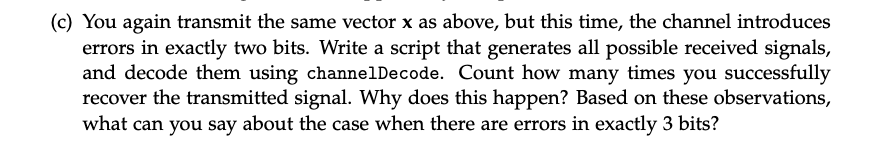

In [566]:
#Q6c

def generateReceived2(x):
    # generates all possible r corresponding to x with 2 bits of error
    # Add the l-1 norm table 2 times and return possible codes
    
    # Uses E and S from question 4
    E,S = buildTable(H)
    e_shape = E.shape
        
    r1 = []
    r2 = []
    for i in range(1,e_shape[0]):
        r1.append(binary_sum(x,E[i,:]))
    
    #adding 2nd error bit in every 1 error that already exist
    aux = np.array(r1)
    for i in r1:
        for j in range(1,e_shape[0]):
            r2.append(binary_sum(i,E[j,:]))
    
    #remove duplicated rows
    r2 = np.ascontiguousarray(r2)
    unique_a = np.unique(r2.view([('', r2.dtype)]*r2.shape[1]))
    r_all = unique_a.view(r2.dtype).reshape((unique_a.shape[0], r2.shape[1]))
    
    id2 = np.where(np.all(r_all==x,axis=1))
  
    #remove any sequence that has 0 bits of error
    r_all = np.delete(r_all,id2,0)

    return np.array(r_all)

        
x_t = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 

R = generateReceived2(x_t)

print("Vector transmitted:")
print(x_t)

print("If xH=0, x is part of the set of codewords and can be decoded:")
print(matrix_sum(x_t*H))


print("Possible received signals (matrix size):")
print(R.shape)

decodeBlock(R, x_t)


Vector transmitted:
[1 1 1 1 1 0 0 0 0 1 0 0 0 0 0]
If xH=0, x is part of the set of codewords and can be decoded:
[0 0 0 0]
Possible received signals (matrix size):
(105, 15)
From all received vector, we could decode to the correct input 0 times!
